In [118]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Colormap for time
import scienceplots
plt.style.use(['science','nature','no-latex','vibrant'])


from scipy.optimize import curve_fit
from scipy.optimize import minimize

#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot


In [119]:
#Location = r"C:\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\data_analysis"
Location = r"//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Thermal_actuation/Experimental/Fluidic/Rothmund_Pressure_release"
Foldernames = ["/Data/v3_repeatability"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

print(data[0][-1].head)

Loading... Folder 1 of 1, Sample 1 of 3
Loading... Folder 1 of 1, Sample 2 of 3
Loading... Folder 1 of 1, Sample 3 of 3
<bound method NDFrame.head of          presFesto-0  DigOut-1   AWM5-12  SSCDP05-3      Time
0           0.000859       0.0 -0.000692  -9.194412     0.001
1           0.000628       0.0 -0.001002  -3.081961     0.002
2           0.000440       0.0 -0.001199   1.861993     0.003
3           0.000291       0.0 -0.001298   5.739052     0.004
4           0.000176       0.0 -0.001312   8.650816     0.005
...              ...       ...       ...        ...       ...
1833995    -0.000066       1.0 -0.000283  35.936338  1833.996
1833996     0.000047       1.0 -0.000257  34.422740  1833.997
1833997     0.000206       1.0 -0.000216  31.737458  1833.998
1833998     0.000416       1.0 -0.000159  27.717133  1833.999
1833999     0.000682       1.0 -0.000084  22.198408  1834.000

[1834000 rows x 5 columns]>


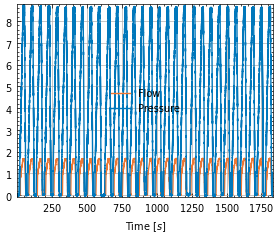

In [33]:
#Plot the profiles over time
#k =0
for i, df in enumerate(data[0]):
    if 'AWM5-5' in df.columns:
        flow = data[0][i]['AWM5-5'].values
    elif 'AWM5-12' in df.columns:
        flow = data[0][i]['AWM5-12'].values


    time = data[0][i]['Time']
    #P_setpoint = data[0][i]['presFesto-1'].values
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'presFesto-1' in df.columns:
        P_setpoint = data[0][i]['presFesto-1'].values
    elif 'presFesto-0' in df.columns:
        P_setpoint = data[0][i]['presFesto-0'].values

    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        # Skip this iteration and move to the next experiment

    if i ==0:
        break
        
#with plt.style.context(['science','nature','no-latex','vibrant']):
    #plt.style.use(['no-latex'])
fig, ax = plt.subplots()  # Set figure size here
ax.plot(time, flow, label='Flow')
ax.plot(time, P/1000, label="Pressure")
ax.autoscale(tight=True)
ax.legend()
ax.set_xlabel('Time [$s$]')
ax.grid()
plt.show()


In [ ]:
data[1]

In [49]:
plt.figure()  # Create a new figure for each experiment
for i, df in enumerate(data[0]):
    
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        continue  # Skip this iteration and move to the next experiment
   
        
    # Assuming Time is common in all DataFrames and is in a column named 'Time'
    #Time = df['Time'].values
    flow = data[0][i]['AWM5-5'].values #SLPM

    plt.scatter( P/1000,flow, label=data[1]['Samplename'][i][5:],marker='.', linewidth=0.000001)
    plt.xlabel('Pressure [$kPa$]')
    plt.ylabel('Flow [$SLPM$]')
    plt.legend(loc='upper left')
    if i==3:
        break 
  
#plt.xlim(0,8) 
plt.grid()
#plt.xlim(0,5)
plt.show() 

KeyError: 'AWM5-5'

<Figure size 640x480 with 0 Axes>

Prepare data: slice per run

In [41]:
# Digi-out is reversed in fluidic 1. ds30_r9_T100_L05
# data[0][3]['DigOut-1'] = [1 if x==0 else 0 for x in data[0][3]['DigOut-1']]



In [120]:
# To prep data for repeatability plot
for uu in range(len(data[0])):
    if uu ==0:
        continue 
    else:
        data[0][uu]['DigOut-1'] = [1 if x==0 else 0 for x in data[0][uu]['DigOut-1']]

In [47]:
# Prep for thickness plot 
# data[0][0]['DigOut-1'] = [1 if x==0 else 0 for x in data[0][0]['DigOut-1']]

In [121]:
# Slice data per run 

data_sliced = []
for index,value in enumerate(data[0]):
    runs = [] # new list for all the runs in data[0]
    start = 0
    run_count = 1  # Counter for run numbe
    #flow = data[0][index]['AWM5-5'].values

    # Check which pressure sensor is used 
    df = data[0][index]
    print(index)

    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    
    if 'AWM5-5' in df.columns:
        flow = data[0][index]['AWM5-5'].values
    elif 'AWM5-12' in df.columns:
        flow = data[0][index]['AWM5-12'].values

    else:
        print(f"Skipping experiment {i+1}: No recognizable pressure sensor data.")
        continue  # Skip this iteration and move to the next experiment

    while start < len(data[0][index]['DigOut-1']):
        start = np.argmax(data[0][index]['DigOut-1'][start:] == 1) +start  # Correcting index for slicing
        end = np.argmax(data[0][index]['DigOut-1'][start:] == 0)+start   # Correcting index for slicing
        
        if end <= start:  # Break if no more valid segments are found
            break

        # Reschale the flow data to compensate for drifting 
        first_value = flow[start]
        flow_rescaled =flow[start:end] - first_value
      
        # Create a DataFrame for this run
        run_df = pd.DataFrame({
            'Time': np.arange(start, end),  # You can replace this with the actual time data if you have it
            'Rescaled_Flow': flow_rescaled[:end - start],
            'Pressure': P[start:end]/1000   # Assuming P is already an array
        })

        # Append this DataFrame to the list
        runs.append(run_df)   

        start = end + 5  # Move to next segment
        run_count += 1  # Increment run counter
    data_sliced.append(runs)

#Remove wrong measurement
#data_sliced[0].pop(8)   # touched setup with finger and messed up flow measurement


0
1
2


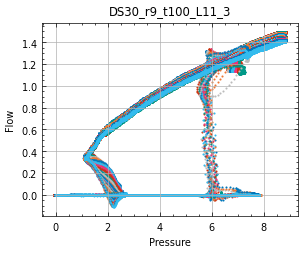

In [125]:
qq = 2
for uu, yy in enumerate(data_sliced[qq]):
    Q = yy['Rescaled_Flow']
    P = yy['Pressure']
    plt.scatter(P, Q,marker='.', linewidth=0.000001)
#plt.legend()
plt.title(data[1]['Samplename'][qq])
plt.xlabel('Pressure')
plt.ylabel('Flow')
plt.grid()
plt.show()   


In [ ]:
len(data_sliced)

Extract opening and closing pressure

In [126]:

# Function for moving average smoothing
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Plot sliced data and extract opening pressure 
P_open = []
P_close = []

open_threshold = 0.1 # slpm
close_threshold = 0.09 # slpm

# Window size for smoothing
window_size = 100  # You can adjust this value based on your requirements

# Initialize a flag to indicate whether the threshold has been crossed from below
crossed_threshold = False

for sample in data_sliced:   
    # Initialize lists for each sample
    P_open_sample = []
    P_close_sample = []
    
    for run in sample:
        Q_raw = run['Rescaled_Flow']
        P_raw = run['Pressure']
        
        # Apply moving average smoothing
        Q = moving_average(Q_raw, window_size)
        P_sliced = moving_average(P_raw, window_size)
        
        # Extract opening pressure
        opening_index = np.argmax(Q > open_threshold)  # If the flow passes a certain threshold, then we can assume it is open
        P_open_sample.append(P_sliced[opening_index])  # Use previous index to recover the pressure 
        
        # Loop through the data
        for jj in range(1, len(Q)):
            # Check for crossing the threshold from below to above
            if Q[jj] > close_threshold:
                crossed_threshold = True
            
            # Check for crossing the threshold from above to below after it's been crossed from below
            if crossed_threshold and Q[jj] < close_threshold:
                P_close_sample.append(P_sliced[jj])
                
                # Reset the flag if you are only interested in the first such occurrence
                crossed_threshold = False
                break
    
    # Append the lists for each sample to the main lists
    P_open.append(P_open_sample)
    P_close.append(P_close_sample)

Results

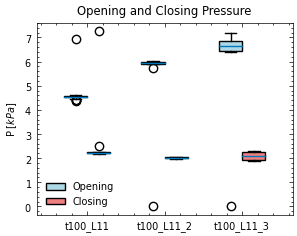

In [127]:
fig, ax = plt.subplots()

# Width of a boxplot
box_width = 0.3

# Positions of the opening pressure boxplots
open_positions = [x - box_width/2 for x in range(len(P_open))]

# Positions of the closing pressure boxplots
close_positions = [x + box_width/2 for x in range(len(P_close))]

# Plot the opening pressure boxplots
bp_open = ax.boxplot(P_open, positions=open_positions, widths=box_width, patch_artist=True, boxprops=dict(facecolor='lightblue'), labels=['Opening']*len(P_open))

# Plot the closing pressure boxplots
bp_close = ax.boxplot(P_close, positions=close_positions, widths=box_width, patch_artist=True, boxprops=dict(facecolor='lightcoral'), labels=['Closing']*len(P_close))

# Set the title and labels
plt.title("Opening and Closing Pressure")
plt.ylabel("P [$kPa$]")

# Set the x-ticks and labels
# Extract the part of the sample name after "t"
sample_names = data[1]['Samplename']
sample_names_after_t = ['t'+name.split('t')[-1] for name in sample_names]

# Set the x-ticks and labels
tick_positions = range(len(sample_names_after_t))
plt.xticks(tick_positions, sample_names_after_t)

# Show the legend
handles = [bp_open['boxes'][0], bp_close['boxes'][0]]
labels = ['Opening', 'Closing']
ax.legend(handles, labels)

plt.show()


In [ ]:
# # Create a colormap
# colormap = cm.get_cmap('viridis')

# # Normalize the time variable to fit the colormap scale
# norm_time = (time - time.min()) / (time.max() - time.min())

# # Loop through and plot each segment with corresponding color
# for i in range(len(time) - 1):
#     plt.scatter(P[i:i+10]/1000, flow[i:i+10], color=colormap(norm_time[i]))

# # Add a colorbar to represent the time variable
# sm = cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=time.min(), vmax=time.max()))
# sm.set_array([])
# plt.colorbar(sm, label='Time [s]')

# plt.xlabel('Pressure [kPa]')
# plt.ylabel('Flow [SLPM]')
# plt.title('Pressure vs Flow Colored by Time')
# #plt.xlim(5,7)
# #plt.ylim(-0.25, 1)


# save_plot('Pressure_vs_flow')


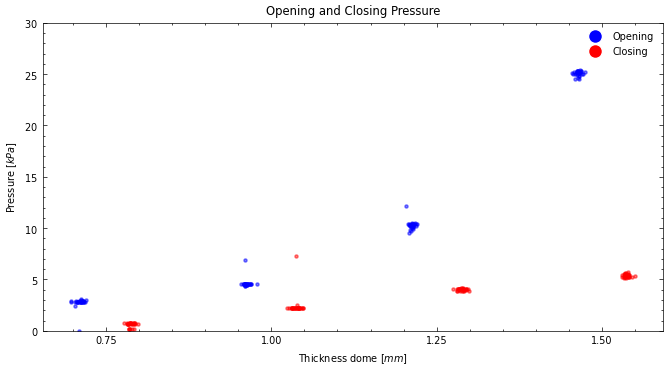

In [60]:
fig, ax = plt.subplots(figsize=(8,4))

# Width of a boxplot
box_width = 0.3

# Positions of the opening pressure boxplots
open_positions = [x - box_width / 2 for x in range(len(P_open))]

# Positions of the closing pressure boxplots
close_positions = [x + box_width / 2 for x in range(len(P_close))]

# Scatter plot of individual data points
for i, (open_data, close_data) in enumerate(zip(P_open, P_close)):
    x_open = np.random.normal(open_positions[i], 0.02, size=len(open_data))  # Add jitter to the x-values
    x_close = np.random.normal(close_positions[i], 0.02, size=len(close_data))  # Add jitter to the x-values

    ax.scatter(x_open, open_data, color='blue', alpha=0.5, s=5)  # Scatter plot for opening pressures
    ax.scatter(x_close, close_data, color='red', alpha=0.5, s=5)  # Scatter plot for closing pressures

# Set the title and labels
plt.title("Opening and Closing Pressure")
plt.ylabel("Pressure [$kPa$]")
plt.xlabel("Thickness dome [$mm$]")

# Set the x-ticks and labels
# Extract the part of the sample name after "t"
sample_names = data[1]['Samplename']
sample_names_after_t = ['0.75', '1.00', '1.25','1.50']# ['t' + name.split('t')[-1] for name in sample_names]

# Set the x-ticks and labels
tick_positions = range(len(sample_names_after_t))
plt.xticks(tick_positions, sample_names_after_t)

# Show the legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label='Opening', markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', label='Closing', markerfacecolor='red', markersize=10)]
labels = ['Opening', 'Closing']
ax.legend(handles, labels)
plt.ylim(0,30)

plt.show()


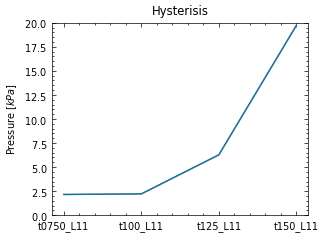

In [69]:
Hysteresis = [np.mean(po) - np.mean(pc) for po, pc in zip(P_open, P_close)]

plt.plot(Hysteresis)
tick_positions = range(len(sample_names_after_t))
plt.xticks(tick_positions, sample_names_after_t)
plt.ylabel('Pressure [$kPa$]')
plt.title('Hysterisis')
plt.ylim(0,20)
plt.grid()
plt.show()

C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

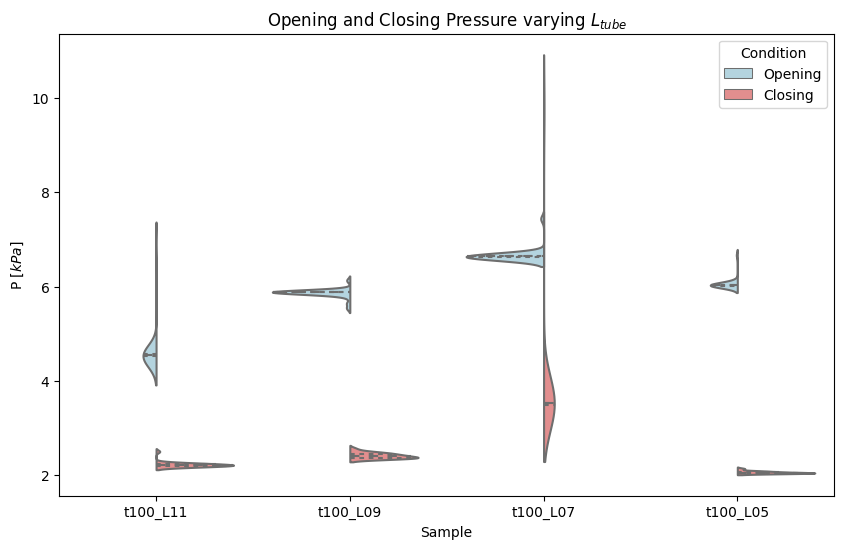

C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

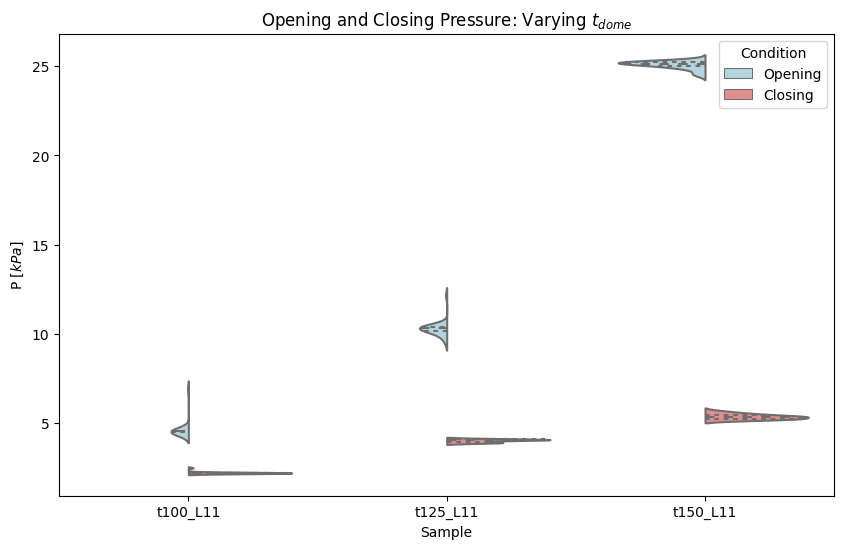

In [173]:
# Prepare the data in long-form
values = []
samples = []
conditions = []

for i, (open_data, close_data, sample_name) in enumerate(zip(P_open, P_close, sample_names_after_t)):
    values.extend(open_data)
    samples.extend([sample_name] * len(open_data))
    conditions.extend(['Opening'] * len(open_data))
    
    values.extend(close_data)
    samples.extend([sample_name] * len(close_data))
    conditions.extend(['Closing'] * len(close_data))

data_2 = pd.DataFrame({
    'Value': values,
    'Sample': samples,
    'Condition': conditions
})

# Define the sample names for the first graph
samples_graph1 = ['t100_L11', 't100_L09', 't100_L07', 't100_L05']

# Filter the data for the first graph
data_graph1 = data_1[data_2['Sample'].isin(samples_graph1)]

# Create the first graph
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='Sample', y='Value', hue='Condition', data=data_graph1, split=True, palette={'Opening': 'lightblue', 'Closing': 'lightcoral'}, inner='quartile')

# Set the title and labels for the first graph
plt.title('Opening and Closing Pressure varying $L_{tube}$')
plt.xlabel('Sample')
plt.ylabel('P [$kPa$]')

# Show the legend for the first graph
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Condition')

plt.show()

# Define the sample names for the second graph
samples_graph2 = ['t100_L11', 't125_L11', 't150_L11']

# Filter the data for the second graph
data_graph2 = data_1[data_2['Sample'].isin(samples_graph2)]

# Create the second graph
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='Sample', y='Value', hue='Condition', data=data_graph2, split=True, palette={'Opening': 'lightblue', 'Closing': 'lightcoral'}, inner='quartile')

# Set the title and labels for the second graph
plt.title('Opening and Closing Pressure: Varying $t_{dome}$')
plt.xlabel('Sample')
plt.ylabel('P [$kPa$]')

# Show the legend for the second graph
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Condition')

plt.show()


C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\vaarkamp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categoric

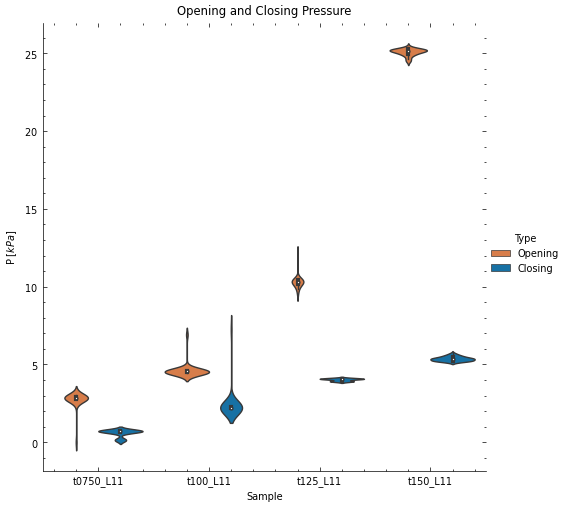

In [71]:
# Flatten the data and create a DataFrame
data_open = []
data_close = []
labels_open = []
labels_close = []
for i, (open_data, close_data, name) in enumerate(zip(P_open, P_close, sample_names)):
    data_open.extend(open_data)
    data_close.extend(close_data)
    labels_open.extend(['t'+name.split('t')[-1] for _ in open_data])
    labels_close.extend(['t'+name.split('t')[-1] for _ in close_data])

df_open = pd.DataFrame({'Pressure': data_open, 'Type': 'Opening', 'Label': labels_open})
df_close = pd.DataFrame({'Pressure': data_close, 'Type': 'Closing', 'Label': labels_close})
df = pd.concat([df_open, df_close])

# Create a catplot
g = sns.catplot(x='Label', y='Pressure', hue='Type', data=df, kind='violin')
g.set_axis_labels("Sample", "P [$kPa$]")
plt.title("Opening and Closing Pressure")

plt.show()


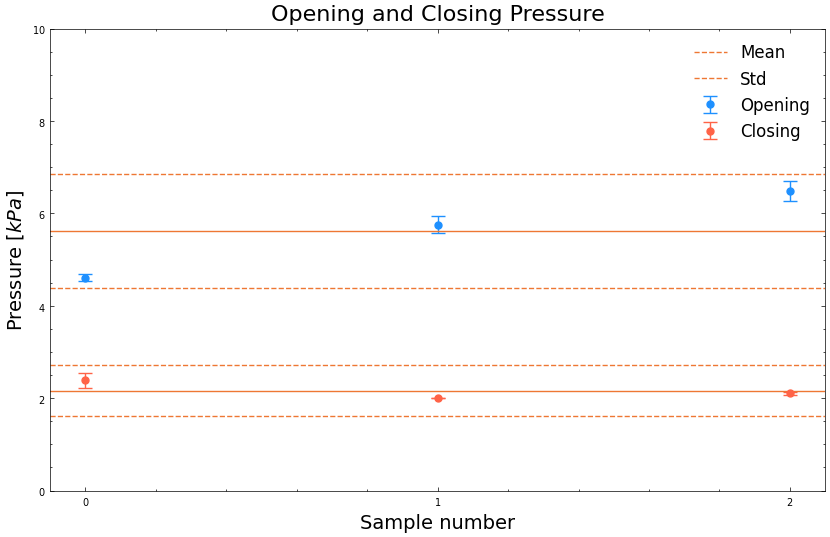

In [141]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

# Width of a boxplot
box_width = 0.3

# Positions of the opening pressure boxplots
open_positions = [x  for x in range(len(P_open))]

# Positions of the closing pressure boxplots
close_positions = [x  for x in range(len(P_close))]

all_open_data = []
all_close_data = []

# Error bar plot of mean and SEM for individual data points
for i, (open_data, close_data) in enumerate(zip(P_open, P_close)):
    # Calculate mean and SEM for opening pressures
    open_mean = np.mean(open_data)
    open_sem = np.std(open_data) / np.sqrt(len(open_data))

    # Plot error bar for opening pressures
    ax.errorbar(open_positions[i], open_mean, yerr=open_sem, color='dodgerblue', capsize=5, marker='o', markersize=5, linestyle='', label='Opening' if i==0 else "")

    # Calculate mean and SEM for closing pressures
    close_mean = np.mean(close_data)
    close_sem = np.std(close_data) / np.sqrt(len(close_data))

    all_open_data.extend(open_data)
    all_close_data.extend(close_data)

    # Plot error bar for closing pressures
    ax.errorbar(close_positions[i], close_mean, yerr=close_sem, color='tomato', capsize=5, marker='o', markersize=5, linestyle='', label='Closing' if i==0 else "")

# Set mean and std lines
ax.axhline(np.mean(all_open_data))
ax.axhline(np.mean(all_open_data)+np.std(all_open_data),linestyle='--',label = 'Mean')
ax.axhline(np.mean(all_open_data)-np.std(all_open_data),linestyle='--', label = 'Std')

ax.axhline(np.mean(all_close_data))
ax.axhline(np.mean(all_close_data)+np.std(all_close_data),linestyle='--')
ax.axhline(np.mean(all_close_data)-np.std(all_close_data),linestyle='--')


# Set the title and labels
ax.set_title("Opening and Closing Pressure", fontsize=16)
ax.set_ylabel("Pressure [$kPa$]", fontsize=14)
ax.set_xlabel("Sample number", fontsize=14)
ax.set_ylim(0,10)

# Set the x-ticks and labels
sample_names = data[1]['Samplename']
sample_names_after_t = ['t' + name.split('t')[-1] for name in sample_names]

# Set the x-ticks and labels
tick_positions = range(len(sample_names_after_t))
ax.set_xticks(tick_positions)

# Manually set x-tick labels
#new_labels = ["0.75","1.00", "1.25","1.50"]
#ax.set_xticklabels(new_labels, fontsize=12)
#ax.set_xticklabels(sample_names_after_t, fontsize=12)

# Show the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=12)

# Set ylim
#ax.set_ylim(0, 10)



plt.show()


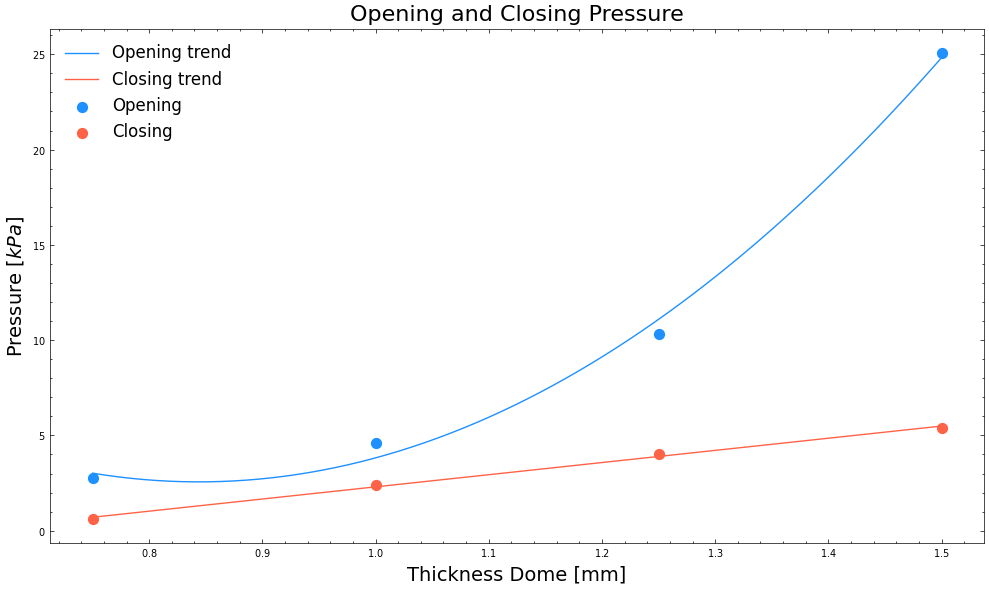

In [75]:


fig, ax = plt.subplots(figsize=(10, 6))

# Data
thickness_values = np.array([0.75, 1.00, 1.25, 1.50])
open_means = [np.mean(data) for data in P_open]
close_means = [np.mean(data) for data in P_close]

# Quadratic fit for opening pressures
def quadratic_fit(x, a, b, c):
    return a * x**2 + b * x + c

# Linear fit for closing pressures
def linear_fit(x, a, b):
    return a * x + b

# Curve fitting
open_params, _ = curve_fit(quadratic_fit, thickness_values, open_means)
close_params, _ = curve_fit(linear_fit, thickness_values, close_means)

# Generating x values for the trendlines
x_values = np.linspace(min(thickness_values), max(thickness_values), 400)

# Plotting the trendlines
ax.plot(x_values, quadratic_fit(x_values, *open_params), color='dodgerblue', label='Opening trend')
ax.plot(x_values, linear_fit(x_values, *close_params), color='tomato', label='Closing trend')

# Plotting the actual data points
ax.scatter(thickness_values, open_means, color='dodgerblue', marker='o', s=50, label='Opening')
ax.scatter(thickness_values, close_means, color='tomato', marker='o', s=50, label='Closing')

# Setting labels, title, and legend
ax.set_title("Opening and Closing Pressure", fontsize=16)
ax.set_ylabel("Pressure [$kPa$]", fontsize=14)
ax.set_xlabel("Thickness Dome [mm]", fontsize=14)
ax.legend(fontsize=12)



plt.tight_layout()
plt.show()


In [92]:
from sklearn.metrics import r2_score
# Define the model based on the relationship
def model(thickness, C):
    radius = 10  # in mm
    return C * (thickness / (radius - thickness))**2

# Objective function to minimize
def objective(C):
    predicted = model(thickness_values, C[0])
    return np.sum((predicted - open_means)**2)

# Initial guess for the constant
initial_guess = [1]

# Use the minimize function to find the best-fitting constant
result = minimize(objective, initial_guess, method='BFGS')

# Extract the optimized constant from the result
optimized_constant = result.x[0]

# Calculate the modeled values using the optimized constant for the actual thickness values
modeled_values_open = model(thickness_values, optimized_constant)

# Calculate the R² value for the opening pressures
r2_open = r2_score(open_means, modeled_values_open)

In [101]:
# Perform a first-order polynomial fit for the closing pressures
coefficients = np.polyfit(thickness_values, close_means, 1)

# Use the coefficients to calculate the modeled values
modeled_values_close = np.polyval(coefficients, thickness_values)

# Calculate the R² value for the closing pressures
r2_close = r2_score(close_means, modeled_values_close)

In [112]:
# Generate a dense array of thickness values for plotting the extended curve
dense_thickness =np.linspace(0, 2, 400) #np.linspace(min(thickness_values), max(thickness_values), 400)

# Calculate the modeled values using the optimized constant for the extended range
extended_modeled_values_open = model(dense_thickness, optimized_constant)


In [121]:
# Calculate the modeled values for the linear fit over the extended range
extended_modeled_values_close = np.polyval(coefficients, dense_thickness)

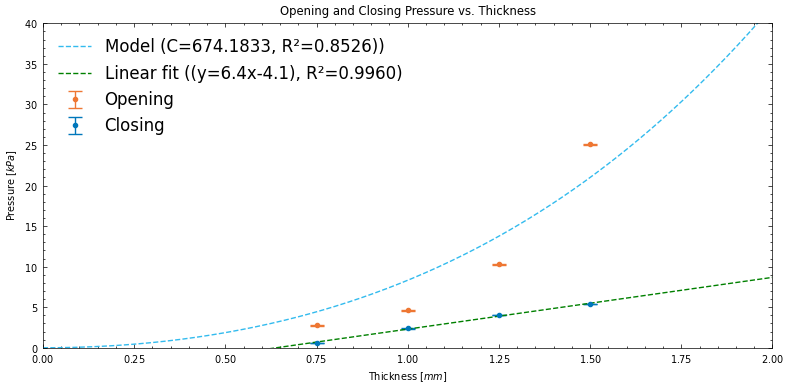

In [126]:
fig, ax = plt.subplots(figsize=(8, 4))

#

# Calculate the modeled values using the optimized constant
modeled_values = model(dense_thickness, optimized_constant)

# Plot the experimental data for opening pressures
ax.errorbar(thickness_values, open_means, yerr=open_sem, fmt='o', capsize=5, label='Opening')

# Plot the experimental data for closing pressures
ax.errorbar(thickness_values, close_means, yerr=close_sem, fmt='o', capsize=5, label='Closing')

# Plot the modeled relationship for opening pressures
ax.plot(dense_thickness, modeled_values, linestyle='--', label=f"Model (C={optimized_constant:.4f}, R²={r2_open:.4f}))")
#ax.plot(thickness_values, modeled_values_close, linestyle='--', color='green', label=f'Linear fit (R²={r2_close:.4f}), (y={coefficients[0]:.1f}x{coefficients[1]:.1f})')
ax.plot(dense_thickness, extended_modeled_values_close, linestyle='--', color='green', label=f'Linear fit ((y={coefficients[0]:.1f}x{coefficients[1]:.1f}), R²={r2_close:.4f})')


# Set title, labels, legend, and other aesthetics
ax.set_title("Opening and Closing Pressure vs. Thickness")
ax.set_xlabel("Thickness [$mm$]")
ax.set_ylabel("Pressure [$kPa$]")
ax.legend(fontsize=12)
ax.set_xlim(0,2)
ax.set_ylim(0,40)

plt.tight_layout()
plt.show()
